In [1]:
import numpy as np
import matplotlib.pyplot as plt

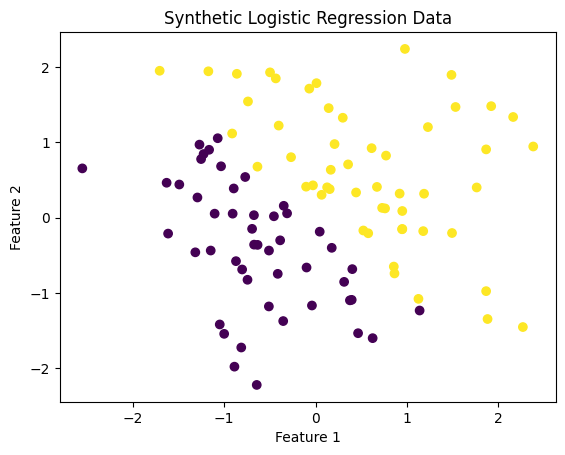

In [2]:
# Generate synthetic data (2 features for simplicity)
np.random.seed(0)
X = np.random.randn(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Class 1 if sum of features > 0 else Class 0

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Logistic Regression Data')
plt.show()

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [4]:
def compute_cost(X, y, theta):
    m = len(y)
    z = X.dot(theta)
    predictions = sigmoid(z)
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost


In [5]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        predictions = sigmoid(X.dot(theta))
        theta -= (alpha / m) * X.T.dot(predictions - y)
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history


In [6]:
# Add a column of ones to X to account for the intercept term
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

In [7]:
theta_initial = np.zeros(X_bias.shape[1])  # Initialize weights to zeros
alpha = 0.1  # Learning rate
iterations = 1000  # Number of iterations

theta_optimal, cost_history = gradient_descent(X_bias, y, theta_initial, alpha, iterations)

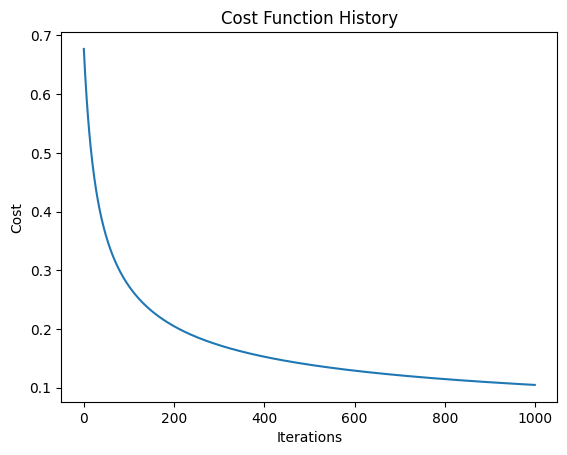

In [8]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()


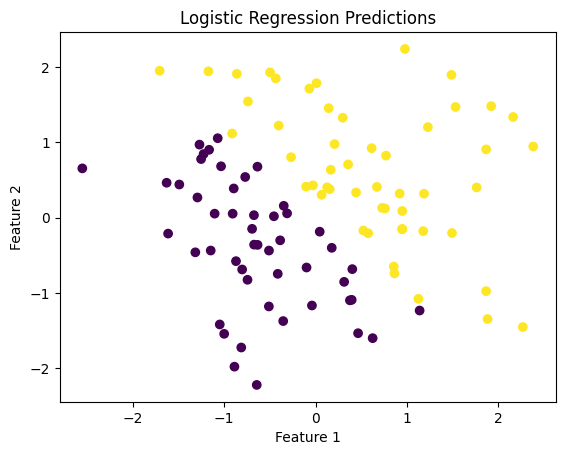

In [9]:
# Predict using the optimal theta
predictions = sigmoid(X_bias.dot(theta_optimal)) >= 0.5

# Visualize the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Predictions')
plt.show()


In [10]:
# Evaluate model accuracy
correct_predictions = np.sum(predictions == y)
accuracy = correct_predictions / len(y)

print(f"Model Accuracy on Training Data: {accuracy * 100:.2f}%")

# Check random prediction example
sample = np.array([1, 0.5, -1])  # bias=1, feature1=0.5, feature2=-1
sample_prediction = sigmoid(sample.dot(theta_optimal))

print(f"Sample Input Prediction Probability (Class 1): {sample_prediction:.4f}")
print(f"Predicted Class: {int(sample_prediction >= 0.5)}")

Model Accuracy on Training Data: 99.00%
Sample Input Prediction Probability (Class 1): 0.1498
Predicted Class: 0
